In [42]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='샘플 지역별 업종 카드소비정보 (1).xlsx', sheet_name='Sheet')
retail_df.head(3)

,기준년월,광역시도명칭,시군구명칭,행정동명칭,행정동코드,소비업종\n 대분류,소비업종\n 중분류,소비업종\n 소분류,성별,연령대,소비 건수,소비금액
0,202104,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,05,25685,3061973276
1,202104,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,04,9981,1234124184
2,202104,서울특별시,서초구,서초2동,1165052000,의료/보험/위생,보험,손해보험,1,06,4264,1050293779


In [43]:
#총 8587개로 데이터가 모두 존재
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8587 entries, 0 to 8586
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준년월       8587 non-null   int64 
 1   광역시도명칭     8587 non-null   object
 2   시군구명칭      8587 non-null   object
 3   행정동명칭      8587 non-null   object
 4   행정동코드      8587 non-null   int64 
 5   소비업종
 대분류  8587 non-null   object
 6   소비업종
 중분류  8587 non-null   object
 7   소비업종
 소분류  8587 non-null   object
 8   성별         8587 non-null   object
 9   연령대        8587 non-null   object
 10  소비 건수      8587 non-null   int64 
 11  소비금액       8587 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 805.2+ KB


In [44]:
#Merge
code_list_B = pd.read_excel(io='샘플 지역별 업종 카드소비정보 (1).xlsx', sheet_name='대분류Code')
code_list_M = pd.read_excel(io='샘플 지역별 업종 카드소비정보 (1).xlsx', sheet_name='중분류Code')
code_list_S = pd.read_excel(io='샘플 지역별 업종 카드소비정보 (1).xlsx', sheet_name='소분류Code')

retail_df = pd.merge(left = retail_df , right = code_list_B, how = "left", on = '소비업종\n 대분류')
retail_df = pd.merge(left = retail_df , right = code_list_M, how = "left", on = '소비업종\n 중분류')
retail_df = pd.merge(left = retail_df , right = code_list_S, how = "left", on = '소비업종\n 소분류')
retail_df

,기준년월,광역시도명칭,시군구명칭,행정동명칭,행정동코드,소비업종\n 대분류,소비업종\n 중분류,소비업종\n 소분류,성별,연령대,소비 건수,소비금액,대분류코드,중분류코드,소분류코드
0,202104,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,05,25685,3061973276,B4,M27,S138
1,202104,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,04,9981,1234124184,B4,M27,S138
2,202104,서울특별시,서초구,서초2동,1165052000,의료/보험/위생,보험,손해보험,1,06,4264,1050293779,B5,M9,S80
3,202104,부산광역시,중구,중앙동,2611051000,유통,유통업,백화점,1,03,6579,830519550,B4,M17,S57
4,202104,경기도,부천시,신중동,4119074200,유통,유통업,백화점,1,03,2934,298318522,B4,M17,S57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8582,202104,대구광역시,수성구,범어4동,2726054000,의료/보험/위생,제약,한약방,2,07,3,-981700,B5,M28,S145
8583,202104,광주광역시,서구,상무1동,2914075100,주생활,생활용품,가구,2,05,3,-1030000,B8,M10,S1
8584,202104,경기도,용인시수지구,동천동,4146556000,주생활,생활용품,가구,1,03,0,-1672000,B8,M10,S1
8585,202104,서울특별시,서초구,서초2동,1165052000,교육/교양/서비스,서비스,기타(용역)서비스,2,02,21,-2752000,B1,M11,S16


In [45]:
#띄어쓰기 컬럼 rename
retail_df.rename(columns={'소비업종\n 대분류':'소비업종대분류','소비업종\n 중분류':'소비업종중분류', '소비업종\n 소분류':'소비업종소분류'}, inplace=True)
retail_df                          

,기준년월,광역시도명칭,시군구명칭,행정동명칭,행정동코드,소비업종대분류,소비업종중분류,소비업종소분류,성별,연령대,소비 건수,소비금액,대분류코드,중분류코드,소분류코드
0,202104,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,05,25685,3061973276,B4,M27,S138
1,202104,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,04,9981,1234124184,B4,M27,S138
2,202104,서울특별시,서초구,서초2동,1165052000,의료/보험/위생,보험,손해보험,1,06,4264,1050293779,B5,M9,S80
3,202104,부산광역시,중구,중앙동,2611051000,유통,유통업,백화점,1,03,6579,830519550,B4,M17,S57
4,202104,경기도,부천시,신중동,4119074200,유통,유통업,백화점,1,03,2934,298318522,B4,M17,S57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8582,202104,대구광역시,수성구,범어4동,2726054000,의료/보험/위생,제약,한약방,2,07,3,-981700,B5,M28,S145
8583,202104,광주광역시,서구,상무1동,2914075100,주생활,생활용품,가구,2,05,3,-1030000,B8,M10,S1
8584,202104,경기도,용인시수지구,동천동,4146556000,주생활,생활용품,가구,1,03,0,-1672000,B8,M10,S1
8585,202104,서울특별시,서초구,서초2동,1165052000,교육/교양/서비스,서비스,기타(용역)서비스,2,02,21,-2752000,B1,M11,S16


In [46]:
#-> 분석 시 제외 해야할 데이터

#성별, 연령대에 _ 데이터가 존재
# 소비금액 -금액 존재

retail_df[retail_df['성별']=='_']

,기준년월,광역시도명칭,시군구명칭,행정동명칭,행정동코드,소비업종대분류,소비업종중분류,소비업종소분류,성별,연령대,소비 건수,소비금액,대분류코드,중분류코드,소분류코드
5,202104,서울특별시,강남구,논현2동,1168053100,식생활,음식/요리,한식(한정식),_,01,2309,172324860,B3,M20,S144
10,202104,서울특별시,서초구,서초2동,1165052000,주생활,컴퓨터/통신,소프트웨어개발(정보서비스),_,01,12,88995200,B8,M32,S79
15,202104,인천광역시,서구,연희동,2826053000,교육/교양/서비스,교육기관,유치원/어린이집,_,01,1083,45315515,B1,M4,S103
35,202104,제주특별자치도,서귀포시,예래동,5013062000,교육/교양/서비스,레져업소,골프장,_,01,52,21068800,B1,M6,S11
48,202104,경기도,군포시,군포2동,4141052000,교육/교양/서비스,레져업소,골프장,_,01,27,18082200,B1,M6,S11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,202104,경상북도,울진군,울진읍,4793025000,유통,유통업,편의점,_,01,1,1500,B4,M17,S142
8556,202104,서울특별시,동대문구,전농2동,1123057000,식생활,식품,기타음료식품,_,_,2,1200,B3,M13,S26
8559,202104,경상남도,거제시,고현동,4831058000,교육/교양/서비스,서비스,비영리단체(기관),_,_,2,1000,B1,M11,S68
8574,202104,서울특별시,강남구,논현2동,1168053100,교육/교양/서비스,서비스,자문(컨설팅)서비스,_,_,0,0,B1,M11,S113


In [47]:
retail_df['소비업종중분류'].unique()
retail_df_text = retail_df

In [48]:
#성별/연령 '_'인 데이터 제외 
retail_df = retail_df[retail_df['성별'] != '_']
retail_df = retail_df[retail_df['연령대'] != '_']
retail_df = retail_df[retail_df['소비금액'] > 0]
#retail_df = retail_df[retail_df['소비금액'] < 1000000000]
retail_df = retail_df[retail_df['소비 건수'] > 0]
#retail_df = retail_df[retail_df['소비 건수'] < 20000]
#retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()
#8587 -> 8084

(8070, 15)


기준년월       0
광역시도명칭     0
시군구명칭      0
행정동명칭      0
행정동코드      0
소비업종대분류    0
소비업종중분류    0
소비업종소분류    0
성별         0
연령대        0
소비 건수      0
소비금액       0
대분류코드      0
중분류코드      0
소분류코드      0
dtype: int64

In [49]:
#기준년월 -> datetime으로 전환
#날짜변환
from datetime import datetime
retail_df['기준년월'] = retail_df['기준년월'].astype('str')
year = retail_df['기준년월'].str[:4]
month = retail_df['기준년월'].str[4:6]
retail_df['기준년월'] = year + '-' + month
retail_df['기준년월']

0       2021-04
1       2021-04
2       2021-04
3       2021-04
4       2021-04
         ...   
8569    2021-04
8570    2021-04
8571    2021-04
8572    2021-04
8573    2021-04
Name: 기준년월, Length: 8070, dtype: object

In [50]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['기준년월'])

In [51]:
#대분류 별 분포 확인
retail_df['소비업종대분류'].value_counts()[:5]

식생활          2350
의료/보험/위생     1890
교육/교양/서비스    1846
주생활           568
의생활           539
Name: 소비업종대분류, dtype: int64

#### customerID 생성

In [52]:
#행정동코드,성별,연령대 별로 CustomerId 생성
retail_df['CustomerID'] = retail_df['행정동코드'].map(str) + retail_df['성별'] + retail_df['연령대']
retail_df['CustomerID_B'] = retail_df['행정동코드'].map(str) + retail_df['성별'] + retail_df['연령대'] +retail_df['대분류코드']
retail_df['CustomerID_M'] = retail_df['행정동코드'].map(str) + retail_df['성별'] + retail_df['연령대'] +retail_df['중분류코드']
retail_df['CustomerID_S'] = retail_df['행정동코드'].map(str) + retail_df['성별'] + retail_df['연령대'] +retail_df['소분류코드']
retail_df['CustomerID_BMS'] = retail_df['행정동코드'].map(str) + retail_df['성별'] + retail_df['연령대'] +retail_df['대분류코드'] +retail_df['중분류코드'] +retail_df['소분류코드']

In [53]:
retail_df.head(3)

,기준년월,광역시도명칭,시군구명칭,행정동명칭,행정동코드,소비업종대분류,소비업종중분류,소비업종소분류,성별,연령대,...,소비금액,대분류코드,중분류코드,소분류코드,InvoiceDate,CustomerID,CustomerID_B,CustomerID_M,CustomerID_S,CustomerID_BMS
0,2021-04,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,05,...,3061973276,B4,M27,S138,2021-04-01,1165061000205,1165061000205B4,1165061000205M27,1165061000205S138,1165061000205B4M27S138
1,2021-04,서울특별시,서초구,방배2동,1165061000,유통,전자상거래,통신판매업,2,04,...,1234124184,B4,M27,S138,2021-04-01,1165061000204,1165061000204B4,1165061000204M27,1165061000204S138,1165061000204B4M27S138
2,2021-04,서울특별시,서초구,서초2동,1165052000,의료/보험/위생,보험,손해보험,1,06,...,1050293779,B5,M9,S80,2021-04-01,1165052000106,1165052000106B5,1165052000106M9,1165052000106S80,1165052000106B5M9S80


In [54]:
#행정동코드 + 성별 + 연령대
print('총 데이터 Raw수 : ',len(retail_df['CustomerID']))
print('Unique CustomerID 수 : ',len(retail_df['CustomerID'].unique()))
print('\n')
print(retail_df['CustomerID'].value_counts())

총 데이터 Raw수 :  8070
Unique CustomerID 수 :  2669


4119074200207    14
4831058000204    13
4119074200102    13
2641061000205    13
4159052000105    12
                 ..
4521034000107     1
4719063000103     1
4311374700105     1
2614066000203     1
1126069000202     1
Name: CustomerID, Length: 2669, dtype: int64


In [55]:
#행정동코드 + 성별 + 연령대 + 대분류
print('총 데이터 Raw수 : ',len(retail_df['CustomerID_B']))
print('Unique CustomerID_B 수 : ',len(retail_df['CustomerID_B'].unique()))
print('\n')
retail_df['CustomerID_B'].value_counts()

총 데이터 Raw수 :  8070
Unique CustomerID_B 수 :  5895




4113562000205B5    5
3020054800205B5    5
4421053500104B1    5
4420059000105B1    5
4615066100204B5    5
                  ..
2820058000206B4    1
4886025000202B4    1
4217053000103B5    1
4777032000204B3    1
4165052000106B8    1
Name: CustomerID_B, Length: 5895, dtype: int64

In [56]:
#행정동코드 + 성별 + 연령대 + 중분류
print('총 데이터 Raw수 : ',len(retail_df['CustomerID_M']))
print('Unique CustomerID_M 수 : ',len(retail_df['CustomerID_M'].unique()))
print('\n')
retail_df['CustomerID_M'].value_counts()

총 데이터 Raw수 :  8070
Unique CustomerID_M 수 :  7169




4113567000204M21    4
4143054000204M21    4
4420059000105M11    4
2914074500206M11    4
4167051000205M21    4
                   ..
4831058000205M11    1
2915569000104M10    1
2914074500107M13    1
4785025000104M21    1
4165052000106M32    1
Name: CustomerID_M, Length: 7169, dtype: int64

In [57]:
#행정동코드 + 성별 + 연령대 + 소분류
print('총 데이터 Raw수 : ',len(retail_df['CustomerID_S']))
print('Unique CustomerID_S 수 : ',len(retail_df['CustomerID_S'].unique()))
print('\n')
retail_df['CustomerID_S'].value_counts()

총 데이터 Raw수 :  8070
Unique CustomerID_S 수 :  8070




1165061000205S138    1
4113562000203S42     1
1154571000102S30     1
2826059000205S105    1
2632052000206S85     1
                    ..
4311451000103S85     1
2914075100203S97     1
1165052000105S15     1
4159052000103S21     1
4165052000106S69     1
Name: CustomerID_S, Length: 8070, dtype: int64

In [58]:
#행정동코드 + 성별 + 연령대 + 대 + 중 + 소분류
print('총 데이터 Raw수 : ',len(retail_df['CustomerID_BMS']))
print('Unique CustomerID_BMS 수 : ',len(retail_df['CustomerID_BMS'].unique()))
print('\n')
retail_df['CustomerID_BMS'].value_counts()[:]

총 데이터 Raw수 :  8070
Unique CustomerID_BMS 수 :  8070




1165061000205B4M27S138    1
4113562000203B1M11S42     1
1154571000102B1M31S30     1
2826059000205B5M21S105    1
2632052000206B4M29S85     1
                         ..
4311451000103B4M29S85     1
2914075100203B1M30S97     1
1165052000105B1M11S15     1
4159052000103B1M6S21      1
4165052000106B8M32S69     1
Name: CustomerID_BMS, Length: 8070, dtype: int64

### RFM 기반 데이터 가공

In [59]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8070 entries, 0 to 8573
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   기준년월            8070 non-null   object        
 1   광역시도명칭          8070 non-null   object        
 2   시군구명칭           8070 non-null   object        
 3   행정동명칭           8070 non-null   object        
 4   행정동코드           8070 non-null   int64         
 5   소비업종대분류         8070 non-null   object        
 6   소비업종중분류         8070 non-null   object        
 7   소비업종소분류         8070 non-null   object        
 8   성별              8070 non-null   object        
 9   연령대             8070 non-null   object        
 10  소비 건수           8070 non-null   int64         
 11  소비금액            8070 non-null   int64         
 12  대분류코드           8070 non-null   object        
 13  중분류코드           8070 non-null   object        
 14  소분류코드           8070 non-null   object        
 15  Invo

In [60]:
#필요한 열 추출

#retail_df = retail_df[['CustomerID','InvoiceDate','소비 건수','소비금액']]
retail_df = retail_df[['CustomerID_B','InvoiceDate','소비 건수','소비금액']]
retail_df.columns = ['CustomerID','InvoiceDate','InvoiceNo','sale_amount']
#retail_df['sale_amount'] = retail_df['sale_amount'].astype(double)

In [61]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8070 entries, 0 to 8573
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   8070 non-null   object        
 1   InvoiceDate  8070 non-null   datetime64[ns]
 2   InvoiceNo    8070 non-null   int64         
 3   sale_amount  8070 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 315.2+ KB


In [62]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 sum() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'sum',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,1111054000102B1,2021-04-01,5,63000
1,1111054000102B3,2021-04-01,75,915600
2,1111054000103B1,2021-04-01,63,555400


In [63]:
cust_df

,CustomerID,Recency,Frequency,Monetary
0,1111054000102B1,2021-04-01,5,63000
1,1111054000102B3,2021-04-01,75,915600
2,1111054000103B1,2021-04-01,63,555400
3,1111054000103B5,2021-04-01,2,82300
4,1111054000104B1,2021-04-01,12,339500
...,...,...,...,...
5890,5013062000203B3,2021-04-01,200,2596700
5891,5013062000205B1,2021-04-01,3,435200
5892,5013062000205B5,2021-04-01,21,136000
5893,5013062000205B6,2021-04-01,3,67700


In [64]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2022,12,31) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (5895, 4)


,CustomerID,Recency,Frequency,Monetary
0,1111054000102B1,640,5,63000
1,1111054000102B3,640,75,915600
2,1111054000103B1,640,63,555400


In [65]:
#지수표현식으로 나올 때 -> pandas display option을 바꿔주면 실수표현이 가능
#https://zel0rd.tistory.com/33
pd.options.display.float_format = '{:.3f}'.format

# pd.reset_option('display.float_format') #초기화
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5895 entries, 0 to 5894
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5895 non-null   object
 1   Recency     5895 non-null   int64 
 2   Frequency   5895 non-null   int64 
 3   Monetary    5895 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 184.3+ KB


### RFM 기반 고객 세그먼테이션

In [66]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

Text(0, 0.5, '도수')

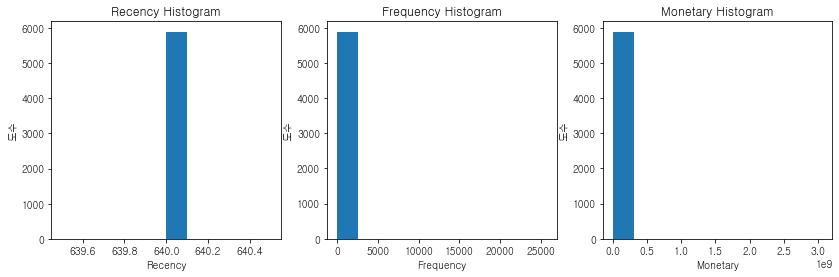

In [67]:
#가로축: 계급  / 세로축 : 도수(횟수나 개수)
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.set_xlabel('Recency')
ax1.set_ylabel('도수')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])
ax2.set_xlabel('Frequency')
ax2.set_ylabel('도수')

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
ax3.set_xlabel('Monetary')
ax3.set_ylabel('도수')

In [68]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,5895.000,5895.000,5895.000
mean,640.000,51.364,2418473.364
std,0.000,401.845,46822356.474
min,640.000,1.000,200.000
25%,640.000,2.000,65420.000
50%,640.000,7.000,271000.000
75%,640.000,30.000,1011050.000
max,640.000,25685.000,3061973276.000


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans #K - means 이용 
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features) #정규분포화

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels))) #0.994 군집화되지 않음;;

실루엣 스코어는 : 0.992


In [70]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
# 각 클러스터 별로 속하는 데이터 포인트 확인
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [71]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed) #PCA 변환
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

C:\Users\USER\AppData\Local\Temp/ipykernel_11304/3288364971.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\USER\AppData\Local\Temp/ipykernel_11304/3288364971.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


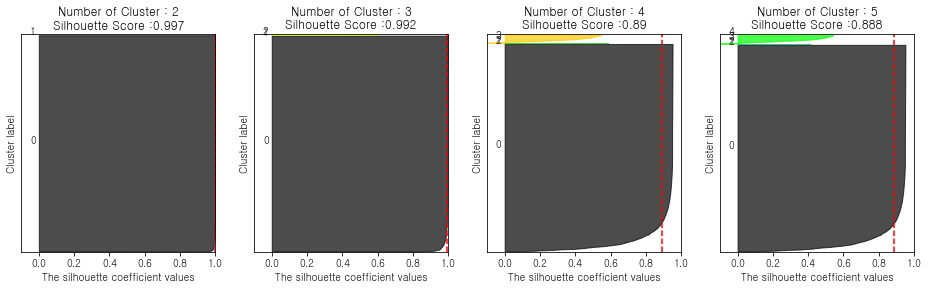

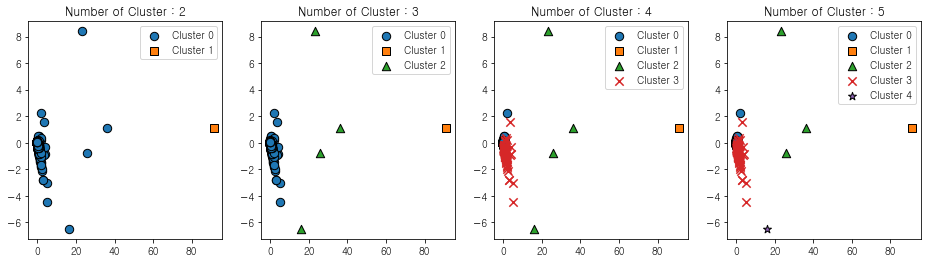

In [72]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [73]:
### Log 변환을 통해 데이터 변환
#큰 값들에 대한 영향도를 줄이기 위해.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.402


(array([   9.,  123.,  666., 1497., 1878., 1295.,  393.,   26.,    4.,
           4.]),
 array([ 5.30330491,  6.95720696,  8.61110901, 10.26501106, 11.91891311,
        13.57281516, 15.22671721, 16.88061926, 18.53452131, 20.18842336,
        21.84232541]),
 <BarContainer object of 10 artists>)

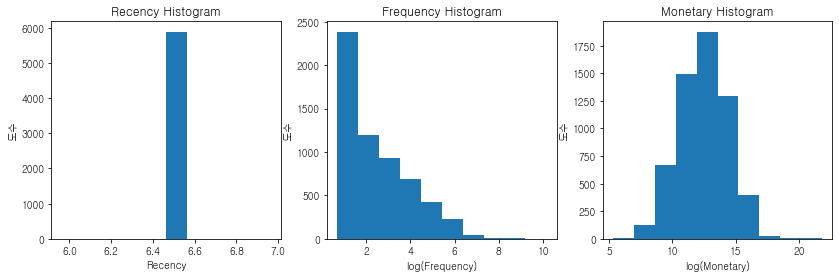

In [74]:
#가로축: 계급  / 세로축 : 도수(횟수나 개수)
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.set_xlabel('Recency')
ax1.set_ylabel('도수')
ax1.hist(np.log1p(cust_df['Recency']))

ax2.set_title('Frequency Histogram')
ax2.set_xlabel('log(Frequency)')
ax2.set_ylabel('도수')
ax2.hist(np.log1p(cust_df['Frequency']))

ax3.set_title('Monetary Histogram')
ax3.set_xlabel('log(Monetary)')
ax3.set_ylabel('도수')
ax3.hist(np.log1p(cust_df['Monetary']))

C:\Users\USER\AppData\Local\Temp/ipykernel_11304/3288364971.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\USER\AppData\Local\Temp/ipykernel_11304/3288364971.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


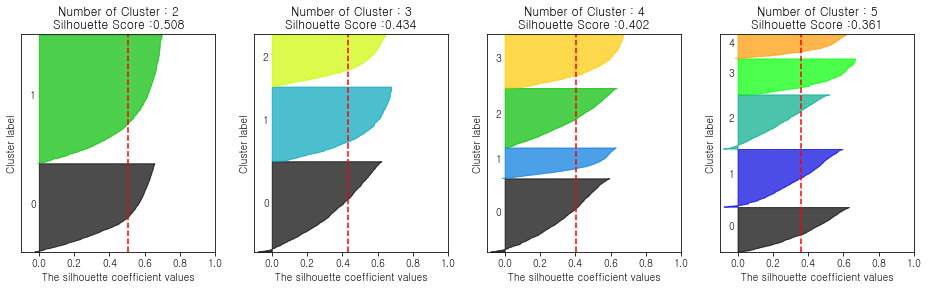

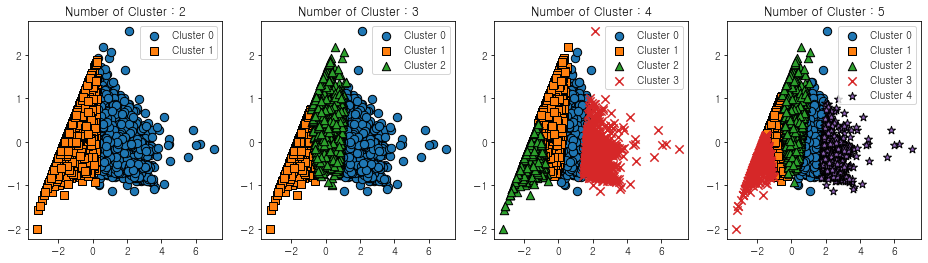

In [75]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [76]:
#클러스터링된 데이터세트의 비즈니스적인 의미는 직접 찾아봐야함
cust_df

,CustomerID,Recency,Frequency,Monetary,cluster_label,Recency_log,Frequency_log,Monetary_log
0,1111054000102B1,640,5,63000,0,6.463,1.792,11.051
1,1111054000102B3,640,75,915600,2,6.463,4.331,13.727
2,1111054000103B1,640,63,555400,2,6.463,4.159,13.227
3,1111054000103B5,640,2,82300,0,6.463,1.099,11.318
4,1111054000104B1,640,12,339500,2,6.463,2.565,12.735
...,...,...,...,...,...,...,...,...
5890,5013062000203B3,640,200,2596700,1,6.463,5.303,14.770
5891,5013062000205B1,640,3,435200,0,6.463,1.386,12.984
5892,5013062000205B5,640,21,136000,2,6.463,3.091,11.820
5893,5013062000205B6,640,3,67700,0,6.463,1.386,11.123


In [77]:
cust_df.to_csv('datus_rfm.csv')